In [1]:
import pandas_datareader as pdr
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
key = '75f27bb21aa3ed8b78d5aabd4a44acafcf5fd288'
symbol = 'AAPL'
start_date = '2010-01-01'
end_date = '2023-01-01'
url = f'https://api.tiingo.com/tiingo/daily/{symbol}/prices?startDate={start_date}&endDate={end_date}&token={key}'
response = requests.get(url)
dat_json = response.json()

In [10]:
data_json = pd.DataFrame(dat_json)

In [11]:
data_json.to_csv('AAPL.csv')

In [12]:
df = pd.read_csv('AAPL.csv')

In [13]:
df.head()

,Unnamed: 0,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,2010-01-04T00:00:00.000Z,214.01,214.50,212.38,213.43,17633200,6.478379,6.493212,6.429036,6.460821,493730093,0.0,1.0
1,1,2010-01-05T00:00:00.000Z,214.38,215.59,213.25,214.60,21496600,6.489579,6.526207,6.455372,6.496239,601905401,0.0,1.0
2,2,2010-01-06T00:00:00.000Z,210.97,215.23,210.75,214.38,19720000,6.386354,6.515310,6.379694,6.489579,552160552,0.0,1.0
3,3,2010-01-07T00:00:00.000Z,210.58,212.00,209.05,211.75,17040400,6.374548,6.417533,6.328232,6.409965,477131677,0.0,1.0
4,4,2010-01-08T00:00:00.000Z,211.98,212.00,209.06,210.30,15986100,6.416928,6.417533,6.328535,6.366072,447611247,0.0,1.0


In [14]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3272 entries, 0 to 3271
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         3272 non-null   object 
 1   close        3272 non-null   float64
 2   high         3272 non-null   float64
 3   low          3272 non-null   float64
 4   open         3272 non-null   float64
 5   volume       3272 non-null   int64  
 6   adjClose     3272 non-null   float64
 7   adjHigh      3272 non-null   float64
 8   adjLow       3272 non-null   float64
 9   adjOpen      3272 non-null   float64
 10  adjVolume    3272 non-null   int64  
 11  divCash      3272 non-null   float64
 12  splitFactor  3272 non-null   float64
dtypes: float64(10), int64(2), object(1)
memory usage: 332.4+ KB


In [22]:
df.describe()

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
count,3272.000000,3272.000000,3272.000000,3272.000000,3.272000e+03,3272.000000,3272.000000,3272.000000,3272.000000,3.272000e+03,3272.000000,3272.000000
mean,253.437777,255.903581,250.803785,253.427734,4.135744e+07,49.194286,49.722404,48.626820,49.170595,2.560435e+08,0.012638,1.002751
std,156.649804,158.120720,155.126409,156.766632,3.394366e+07,47.560137,48.142559,46.934775,47.531925,2.226763e+08,0.155894,0.117259
min,90.280000,90.700000,89.470000,90.000000,5.624800e+06,5.813619,5.933191,5.759130,5.823306,3.519586e+07,0.000000,1.000000
25%,130.553750,131.712500,129.450000,130.682500,1.847527e+07,16.532801,16.721717,16.400536,16.532900,1.019649e+08,0.000000,1.000000
50%,178.965000,180.500000,177.400000,179.010000,2.926446e+07,27.230842,27.448207,27.097938,27.261215,1.665103e+08,0.000000,1.000000
75%,349.435000,351.647900,346.067500,348.905000,5.386869e+07,54.646875,55.333110,54.252124,54.805538,3.455630e+08,0.000000,1.000000
max,702.100000,705.070000,699.570000,702.410000,3.326072e+08,179.958601,180.878119,177.101173,180.571613,1.881000e+09,3.290000,7.000007


In [23]:
closing_col = df.reset_index()['close']

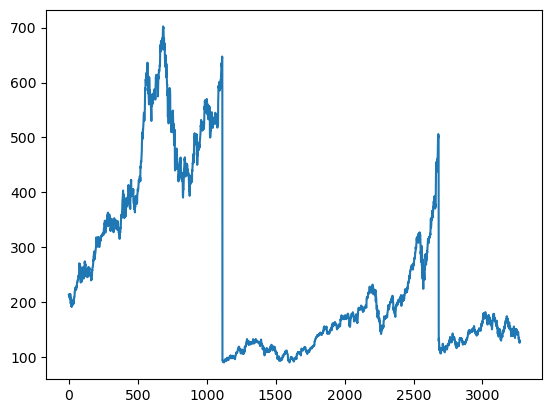

In [24]:
plt.plot(closing_col)

In [26]:
closing_col = np.array(data).reshape(-1,1)

In [27]:
closing_col.shape

(3272, 1)

In [28]:
from sklearn.preprocessing import MinMaxScaler

In [31]:
scaler = MinMaxScaler(feature_range=(0,1))
closing_col = scaler.fit_transform(closing_col)

In [33]:
train_size = int(len(closing_col) * 0.70)
test_size = int(len(closing_col) - train_size)

In [34]:
train_data,test_data = closing_col[0:train_size,:],closing_col[train_size:len(closing_col),:1]

In [38]:
train_data.shape,test_data.shape

((2290, 1), (982, 1))

In [42]:
def create_dataset(dataset,time_step=1):
    dataX,dataY = [],[]
    for i in range(len(dataset) - time_step-1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i + time_step,0])
    return np.array(dataX) , np.array(dataY)

In [43]:
time_step = 100
X_train , y_train = create_dataset(train_data,time_step)
X_test, y_test = create_dataset(test_data,time_step)

In [44]:
X_train

array([[0.20223268, 0.20283744, 0.1972639 , ..., 0.2557615 , 0.25324442,
        0.25142852],
       [0.20283744, 0.1972639 , 0.19662646, ..., 0.25324442, 0.25142852,
        0.26653264],
       [0.1972639 , 0.19662646, 0.19891471, ..., 0.25142852, 0.26653264,
        0.27230231],
       ...,
       [0.20929358, 0.21831584, 0.21377202, ..., 0.12253604, 0.12448106,
        0.12461181],
       [0.21831584, 0.21377202, 0.22250008, ..., 0.12448106, 0.12461181,
        0.13234285],
       [0.21377202, 0.22250008, 0.2182995 , ..., 0.12461181, 0.13234285,
        0.13713184]])

In [46]:
X_train.shape

(2189, 100)

In [47]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [50]:
model = Sequential()

In [52]:
model.add(LSTM(128,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(64,return_sequences=True))
model.add(LSTM(64))
model.add(Dense(1))

In [53]:
model.compile(loss='mean_squared_error',optimizer='adam')

In [54]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 128)          66560     
                                                                 
 lstm_1 (LSTM)               (None, 100, 64)           49408     
                                                                 
 lstm_2 (LSTM)               (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 149057 (582.25 KB)
Trainable params: 149057 (582.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [55]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=60,batch_size=64,verbose=1)

Epoch 1/60
35/35 [==============================] - 55s 943ms/step - loss: 0.0171 - val_loss: 0.0038
Epoch 2/60
35/35 [==============================] - 25s 719ms/step - loss: 0.0039 - val_loss: 0.0033
Epoch 3/60
35/35 [==============================] - 26s 742ms/step - loss: 0.0031 - val_loss: 0.0031
Epoch 4/60
35/35 [==============================] - 26s 726ms/step - loss: 0.0028 - val_loss: 0.0032
Epoch 5/60
35/35 [==============================] - 28s 796ms/step - loss: 0.0027 - val_loss: 0.0028
Epoch 6/60
35/35 [==============================] - 27s 767ms/step - loss: 0.0024 - val_loss: 0.0024
Epoch 7/60
35/35 [==============================] - 25s 714ms/step - loss: 0.0020 - val_loss: 0.0020
Epoch 8/60
35/35 [==============================] - 28s 810ms/step - loss: 0.0019 - val_loss: 0.0019
Epoch 9/60
35/35 [==============================] - 29s 842ms/step - loss: 0.0020 - val_loss: 0.0017
Epoch 10/60
35/35 [==============================] - 29s 820ms/step - loss: 0.0016 - val_lo

In [56]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

28/28 [==============================] - 5s 182ms/step


In [57]:
train_pred = scaler.inverse_transformsformse_transform(train_pred)
test_pred = scaler.inverse_transform(test_pred)

In [58]:
from sklearn.metrics import mean_squared_error

In [59]:
# Train Eval
np.sqrt(mean_squared_error(y_train,train_pred))

317.7319566214245

In [60]:
# Test Eval
np.sqrt(mean_squared_error(y_test,test_pred))

201.95066380094718